In [180]:
import numpy as np


In [181]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


In [182]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [183]:
import numpy as np

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)  # Si le fichier contient des données de types variés
list_index_wanted = np.load('list_index_wanted.npy')

# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [184]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


In [185]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [186]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


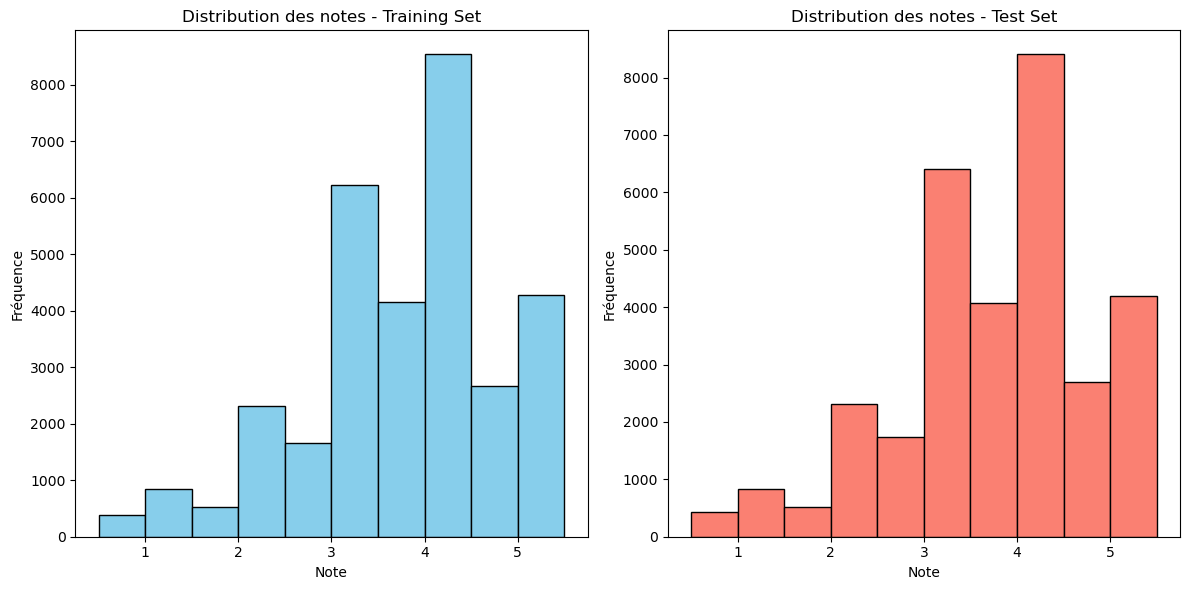

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


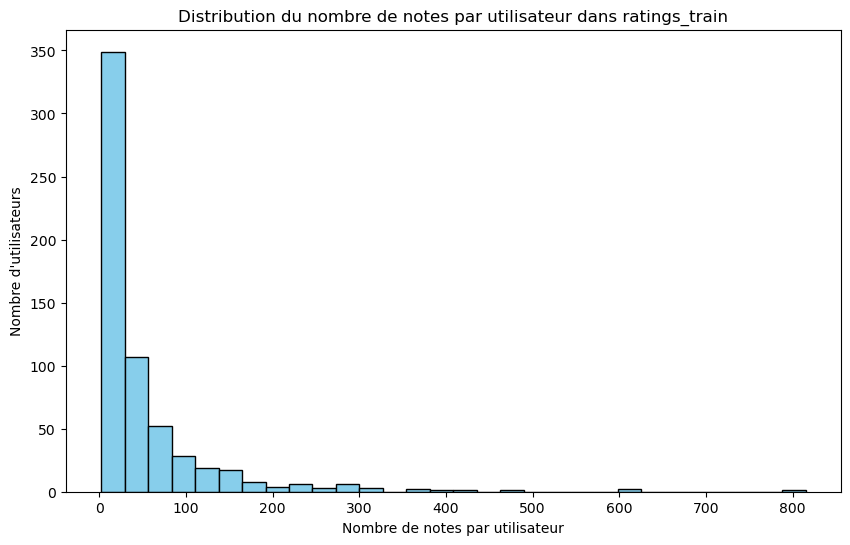

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


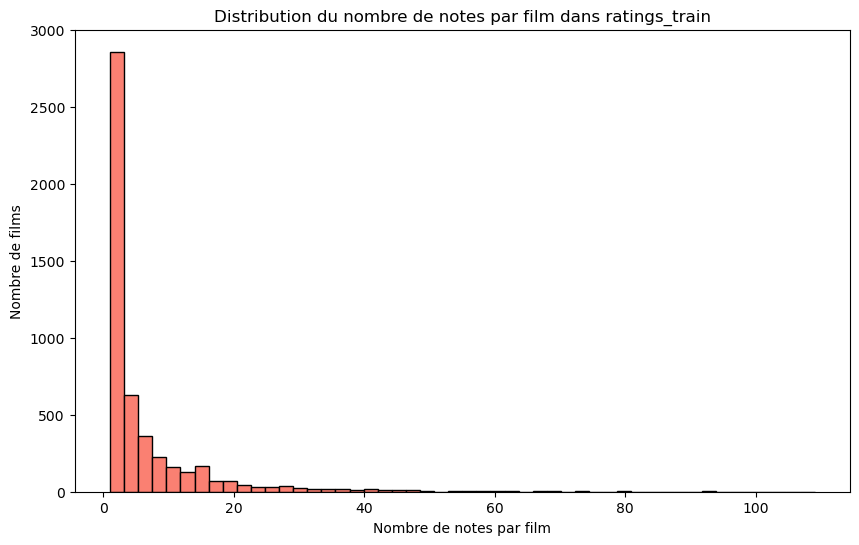

In [189]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


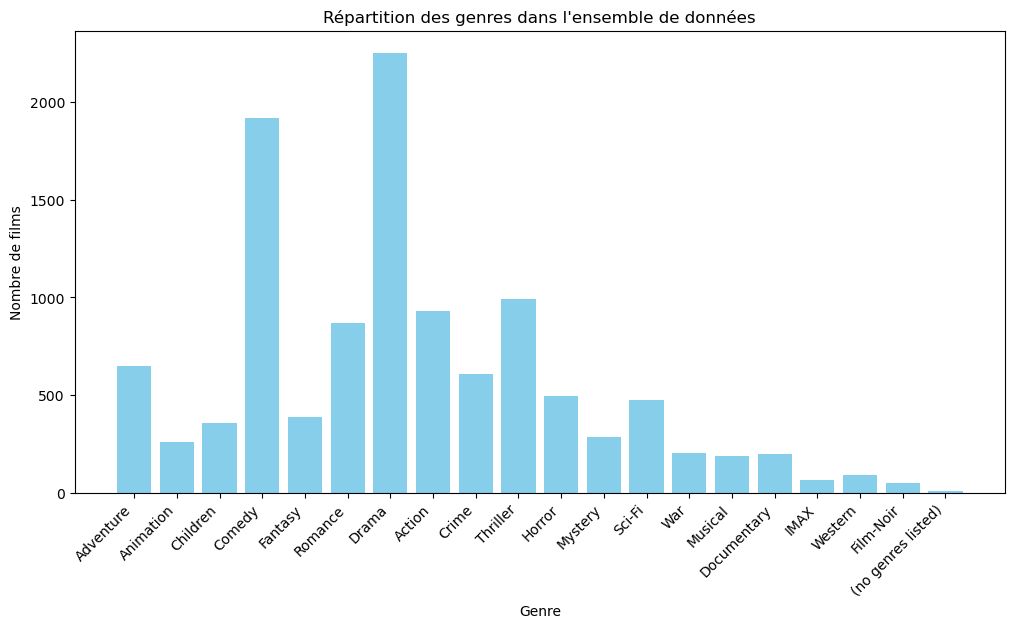

In [190]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

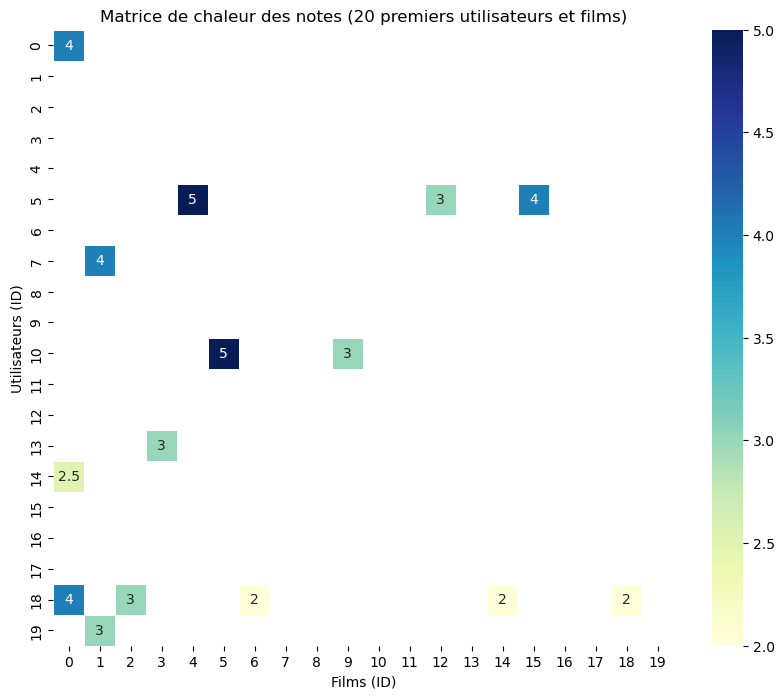

In [191]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

# Méthode SVD

In [192]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

In [193]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i,j] != 0
]

In [194]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [195]:
parameters = {"n_factors": [150, 200, 300], "reg_all": [0.01, 0.1, 0.2, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [196]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 150, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8878574815867026


In [197]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator["rmse"]

# Générer les prédictions pour les indices souhaités
predicted_ratings = []
for user_index, product_index in list_index_wanted:
    pred = best_model.predict(user_index, product_index)
    predicted_ratings.append((user_index, product_index, pred.est))

# Affichage des prédictions
for prediction in predicted_ratings:
    print(f"Utilisateur {prediction[0]}, Produit {prediction[1]}, Note prédite : {prediction[2]}")


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.887638326148663
Utilisateur 0, Produit 42, Note prédite : 3.2577649945428213
Utilisateur 0, Produit 237, Note prédite : 3.3308121063575347
Utilisateur 0, Produit 250, Note prédite : 3.5610194166984006
Utilisateur 0, Produit 261, Note prédite : 3.133038250093473
Utilisateur 0, Produit 265, Note prédite : 3.45517798413045
Utilisateur 0, Produit 352, Note prédite : 3.6656974466520293
Utilisateur 0, Produit 372, Note prédite : 3.455822569793763
Utilisateur 0, Produit 387, Note prédite : 3.257872090096358
Utilisateur 0, Produit 393, Note prédite : 3.722153888944432
Utilisateur 0, Produit 421, Note prédite : 3.6966919256194797
Utilisateur 0, Produit 475, Note prédite : 3.8158811099950167
Utilisateur 0, Produit 502, Note prédite : 3.257932445947072
Utilisateur 0, Produit 555, Note prédite : 4.097342631368158
Utilisateur 0, Produit 572, Note prédite : 4.079829668067123
Utilisateur 0, Produit 585, Note p

In [198]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset()


In [199]:
from surprise import Dataset, Reader, accuracy
from sklearn.metrics import r2_score
import numpy as np
from surprise.model_selection import GridSearchCV

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test_svd = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test_svd = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE SVD (Test) :", rmse_with_mask_test_svd)
print("R² SVD (Test) :", r2_with_mask_test_svd)


RMSE: 0.9094
RMSE SVD (Test) : 0.9093989182735102
R² SVD (Test) : 0.23067626900137683


In [200]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Générer le trainset complet pour Surprise
trainset_full = train_dataset.build_full_trainset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train_svd = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train_svd = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE SVD (Entraînement - Surprise) :", rmse_with_mask_train_svd)
print("R² SVD (Entraînement - Surprise) :", r2_with_mask_train_svd)


RMSE: 0.8106
RMSE SVD (Entraînement - Surprise) : 0.8106225591319053
R² SVD (Entraînement - Surprise) : 0.38373338368720145


In [201]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test_svd - rmse_with_mask_train_svd}")
print(f"Différence R² (test - entraînement) : {rmse_with_mask_test_svd - r2_with_mask_train_svd}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.09877635914160487
Différence R² (test - entraînement) : 0.5256655345863087


# Méthode Hybride (SVD + KNN avec pondération) 

In [202]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [203]:
# Charger les matrices de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Préparer les données pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [204]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)


In [205]:
# Définir les paramètres et faire un GridSearch pour KNNWithZScore
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [206]:
# Définir la pondération pour la combinaison des prédictions SVD et KNN
alpha = 0.7  # Pondération pour SVD (ajustable entre 0 et 1)

# Fonction pour calculer les prédictions hybrides
def hybrid_prediction(uid, iid):
    # Prédiction SVD
    pred_svd = svd.predict(uid, iid).est
    # Prédiction KNN
    pred_knn = best_knn_model.predict(uid, iid).est
    # Combinaison pondérée
    return alpha * pred_svd + (1 - alpha) * pred_knn


In [207]:
# Calcul des prédictions hybrides pour le jeu d'entraînement
train_predictions_hybrid = []
actual_ratings_train = []
for uid, iid, true_r in train_data:
    pred = hybrid_prediction(uid, iid)
    train_predictions_hybrid.append(pred)
    actual_ratings_train.append(true_r)

# Calcul du RMSE et du R² pour l'entraînement
rmse_train_hybrid = np.sqrt(mean_squared_error(actual_ratings_train, train_predictions_hybrid))
r2_train_hybrid = r2_score(actual_ratings_train, train_predictions_hybrid)
print("RMSE (Entraînement - Hybride SVD + KNN) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride SVD + KNN) :", r2_train_hybrid)


RMSE (Entraînement - Hybride SVD + KNN) : 0.5817514592104518
R² (Entraînement - Hybride SVD + KNN) : 0.6826005035452248


In [208]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])


In [209]:
# Calcul des prédictions hybrides pour le jeu de test
test_predictions_hybrid = []
actual_ratings_test = []
for uid, iid, true_r in test_data:
    pred = hybrid_prediction(uid, iid)
    test_predictions_hybrid.append(pred)
    actual_ratings_test.append(true_r)

# Calcul du RMSE et du R² pour le test
rmse_test_hybrid = np.sqrt(mean_squared_error(actual_ratings_test, test_predictions_hybrid))
r2_test_hybrid = r2_score(actual_ratings_test, test_predictions_hybrid)
print("RMSE (Test - Hybride SVD + KNN) :", rmse_test_hybrid)
print("R² (Test - Hybride SVD + KNN) :", r2_test_hybrid)


RMSE (Test - Hybride SVD + KNN) : 0.8802338673709666
R² (Test - Hybride SVD + KNN) : 0.27923048306310705


In [210]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_hybrid - rmse_train_hybrid}")
print(f"Différence R² (test - entraînement) : {r2_test_hybrid - r2_train_hybrid}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.29848240816051486
Différence R² (test - entraînement) : -0.4033700204821178


# test
Pour ajuster le paramètre de pondération alpha dans la méthode hybride, nous allons tester plusieurs valeurs de alpha (par exemple, de 0.1 à 0.9 par incréments de 0.1) et comparer le RMSE et le R² obtenus pour chaque valeur. Cela nous permettra de trouver la meilleure configuration de alpha pour optimiser les résultats de la méthode hybride.

In [211]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger les données
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [212]:
# Fonction pour évaluer le modèle hybride avec différents alphas
def evaluate_hybrid(alpha):
    # Prédictions pour le jeu d'entraînement avec SVD et KNN
    train_predictions_svd = svd.test(trainset.build_testset())
    train_predictions_knn = best_knn_model.test(trainset.build_testset())

    # Combinaison pondérée des prédictions pour le jeu d'entraînement
    predicted_ratings_train_hybrid = [
        alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn)
    ]
    actual_ratings_train_hybrid = [pred.r_ui for pred in train_predictions_svd]

    # Calcul du RMSE et R² pour le jeu d'entraînement
    rmse_train = np.sqrt(mean_squared_error(actual_ratings_train_hybrid, predicted_ratings_train_hybrid))
    r2_train = r2_score(actual_ratings_train_hybrid, predicted_ratings_train_hybrid)

    # Prédictions pour le jeu de test avec SVD et KNN
    test_data = []
    for user_id in range(ratings_test_matrix.shape[0]):
        for item_id in range(ratings_test_matrix.shape[1]):
            rating = ratings_test_matrix[user_id, item_id]
            if rating > 0:
                test_data.append([user_id, item_id, rating])
    test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
    test_dataset = Dataset.load_from_df(test_data_df, reader)
    testset = test_dataset.build_full_trainset().build_testset()

    test_predictions_svd = svd.test(testset)
    test_predictions_knn = best_knn_model.test(testset)

    # Combinaison pondérée des prédictions pour le jeu de test
    predicted_ratings_test_hybrid = [
        alpha * svd_pred.est + (1 - alpha) * knn_pred.est
        for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn)
    ]
    actual_ratings_test_hybrid = [pred.r_ui for pred in test_predictions_svd]

    # Calcul du RMSE et R² pour le jeu de test
    rmse_test = np.sqrt(mean_squared_error(actual_ratings_test_hybrid, predicted_ratings_test_hybrid))
    r2_test = r2_score(actual_ratings_test_hybrid, predicted_ratings_test_hybrid)

    return rmse_train, r2_train, rmse_test, r2_test

# Tester plusieurs valeurs de alpha et afficher les résultats
alphas = np.arange(0.1, 1.0, 0.1)
best_alpha = 0
best_rmse_test = float("inf")

for alpha in alphas:
    rmse_train, r2_train, rmse_test, r2_test = evaluate_hybrid(alpha)
    print(f"Alpha: {alpha:.1f} | RMSE (Entraînement): {rmse_train:.4f} | R² (Entraînement): {r2_train:.4f} | RMSE (Test): {rmse_test:.4f} | R² (Test): {r2_test:.4f}")
    
    if rmse_test < best_rmse_test:
        best_rmse_test = rmse_test
        best_alpha = alpha

print(f"\nMeilleure valeur de alpha: {best_alpha:.1f} avec RMSE (Test): {best_rmse_test:.4f}")


Alpha: 0.1 | RMSE (Entraînement): 0.5170 | R² (Entraînement): 0.7493 | RMSE (Test): 0.9142 | R² (Test): 0.2225
Alpha: 0.2 | RMSE (Entraînement): 0.5161 | R² (Entraînement): 0.7502 | RMSE (Test): 0.9034 | R² (Test): 0.2408
Alpha: 0.3 | RMSE (Entraînement): 0.5196 | R² (Entraînement): 0.7468 | RMSE (Test): 0.8946 | R² (Test): 0.2554
Alpha: 0.4 | RMSE (Entraînement): 0.5275 | R² (Entraînement): 0.7390 | RMSE (Test): 0.8880 | R² (Test): 0.2665
Alpha: 0.5 | RMSE (Entraînement): 0.5396 | R² (Entraînement): 0.7269 | RMSE (Test): 0.8835 | R² (Test): 0.2739
Alpha: 0.6 | RMSE (Entraînement): 0.5556 | R² (Entraînement): 0.7105 | RMSE (Test): 0.8812 | R² (Test): 0.2777
Alpha: 0.7 | RMSE (Entraînement): 0.5751 | R² (Entraînement): 0.6898 | RMSE (Test): 0.8811 | R² (Test): 0.2778
Alpha: 0.8 | RMSE (Entraînement): 0.5979 | R² (Entraînement): 0.6647 | RMSE (Test): 0.8832 | R² (Test): 0.2744
Alpha: 0.9 | RMSE (Entraînement): 0.6236 | R² (Entraînement): 0.6353 | RMSE (Test): 0.8875 | R² (Test): 0.2673



# test 
D'après les résultats, la meilleure valeur de alpha est 0.7, offrant un RMSE de test de 0.8803 et un R² de test de 0.2692. Je vais structurer le code pour calculer les métriques de performance (RMSE et R²) pour les jeux d'entraînement et de test avec cette valeur optimale d'alpha.




In [213]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)

# Entraîner SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Entraîner KNN avec les meilleurs paramètres trouvés précédemment
param_grid = {
    'k': [20, 30, 40],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset)
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [214]:
# Définir alpha optimal trouvé
alpha = 0.7

# Prédictions pour le jeu d'entraînement avec SVD et KNN
train_predictions_svd = svd.test(trainset.build_testset())
train_predictions_knn = best_knn_model.test(trainset.build_testset())

# Combinaison pondérée des prédictions pour le jeu d'entraînement
predicted_ratings_train_pond_knn_svd = [
    alpha * svd_pred.est + (1 - alpha) * knn_pred.est
    for svd_pred, knn_pred in zip(train_predictions_svd, train_predictions_knn)
]
actual_ratings_train_pond_knn_svd = [pred.r_ui for pred in train_predictions_svd]

# Calcul du RMSE et R² pour le jeu d'entraînement
rmse_train_pond_knn_svd = np.sqrt(np.mean((np.array(actual_ratings_train_pond_knn_svd) - np.array(predicted_ratings_train_pond_knn_svd)) ** 2))
r2_train_pond_knn_svd = r2_score(actual_ratings_train_pond_knn_svd, predicted_ratings_train_pond_knn_svd)

print("RMSE (Entraînement - Pondération KNN + SVD) :", rmse_train_pond_knn_svd)
print("R² (Entraînement - Pondération KNN + SVD) :", r2_train_pond_knn_svd)


RMSE (Entraînement - Pondération KNN + SVD) : 0.577056691583018
R² (Entraînement - Pondération KNN + SVD) : 0.6877026969066492


In [215]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [216]:
# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_svd = svd.test(testset)
test_predictions_knn = best_knn_model.test(testset)

# Combinaison pondérée des prédictions pour le jeu de test
predicted_ratings_test_pond_knn_svd = [
    alpha * svd_pred.est + (1 - alpha) * knn_pred.est
    for svd_pred, knn_pred in zip(test_predictions_svd, test_predictions_knn)
]
actual_ratings_test_pond_knn_svd = [pred.r_ui for pred in test_predictions_svd]

# Calcul du RMSE et R² pour le jeu de test
rmse_test_pond_knn_svd = np.sqrt(np.mean((np.array(actual_ratings_test_pond_knn_svd) - np.array(predicted_ratings_test_pond_knn_svd)) ** 2))
r2_test_pond_knn_svd = r2_score(actual_ratings_test_pond_knn_svd, predicted_ratings_test_pond_knn_svd)

print("RMSE (Test - Pondération KNN + SVD) :", rmse_test_pond_knn_svd)
print("R² (Test - Pondération KNN + SVD) :", r2_test_pond_knn_svd)

# Comparaison des résultats entre le jeu d'entraînement et le jeu de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_pond_knn_svd - rmse_train_pond_knn_svd}")
print(f"Différence R² (test - entraînement) : {r2_test_pond_knn_svd - r2_train_pond_knn_svd}")


RMSE (Test - Pondération KNN + SVD) : 0.8797122187319993
R² (Test - Pondération KNN + SVD) : 0.280084522066534

--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.30265552714898136
Différence R² (test - entraînement) : -0.4076181748401152


# Combinaison KNN SVD

In [217]:
from surprise import Dataset, Reader, KNNWithZScore, SVD, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

# Charger la matrice de notation
ratings_train_matrix = np.load('ratings_train.npy')
ratings_test_matrix = np.load('ratings_test.npy')


In [218]:
# Centrer les notes pour chaque utilisateur dans les données d'entraînement
user_mean_train = np.nanmean(np.where(ratings_train_matrix != 0, ratings_train_matrix, np.nan), axis=1)
ratings_train_centered = ratings_train_matrix - user_mean_train[:, None]
ratings_train_centered = np.nan_to_num(ratings_train_centered, nan=0)

# Convertir les matrices en format DataFrame pour Surprise
train_data = []
for user_id in range(ratings_train_matrix.shape[0]):
    for item_id in range(ratings_train_matrix.shape[1]):
        rating = ratings_train_matrix[user_id, item_id]
        if rating > 0:
            train_data.append([user_id, item_id, rating])

train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [219]:
# Définir et entraîner le modèle SVD
svd = SVD()
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

# Utiliser SVD pour obtenir des prédictions de base
train_predictions_svd = svd.test(trainset.build_testset())
predicted_ratings_svd = np.array([pred.est for pred in train_predictions_svd])


In [220]:
# Préparer les données pour appliquer KNN sur les prédictions SVD
train_data_knn = []
for idx, pred in enumerate(train_predictions_svd):
    train_data_knn.append([pred.uid, pred.iid, pred.est])

train_data_knn_df = pd.DataFrame(train_data_knn, columns=["user_id", "item_id", "rating"])
train_dataset_knn = Dataset.load_from_df(train_data_knn_df, reader)


In [221]:
# Appliquer KNN avec les résultats SVD
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 3, 5],
    'sim_options': {'name': ['cosine', 'msd'], 'user_based': [False]}
}
grid_search = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse'], cv=5, refit=True)
grid_search.fit(train_dataset_knn)

# Meilleurs paramètres et meilleur modèle
best_knn_model = grid_search.best_estimator['rmse']
best_knn_model.fit(train_dataset_knn.build_full_trainset())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [222]:
# Prédictions pour l'ensemble d'entraînement avec le modèle KNN ajusté sur SVD
train_predictions_combined = best_knn_model.test(trainset.build_testset())

# Calcul du RMSE et du R² pour l'entraînement
predicted_ratings_train_combined = np.array([pred.est for pred in train_predictions_combined])
actual_ratings_train_combined = np.array([pred.r_ui for pred in train_predictions_combined])
rmse_train_combined = accuracy.rmse(train_predictions_combined, verbose=True)
r2_train_combined = r2_score(actual_ratings_train_combined, predicted_ratings_train_combined)

print("RMSE (Entraînement - SVD + KNN) :", rmse_train_combined)
print("R² (Entraînement - SVD + KNN) :", r2_train_combined)


RMSE: 0.7709
RMSE (Entraînement - SVD + KNN) : 0.7709064225108131
R² (Entraînement - SVD + KNN) : 0.4426415387853604


In [223]:
# Préparation des données de test
test_data = []
for user_id in range(ratings_test_matrix.shape[0]):
    for item_id in range(ratings_test_matrix.shape[1]):
        rating = ratings_test_matrix[user_id, item_id]
        if rating > 0:
            test_data.append([user_id, item_id, rating])

test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()


In [224]:
# Utiliser le modèle KNN sur les prédictions SVD pour prédire le jeu de test
test_predictions_combined = best_knn_model.test(testset)

# Calcul du RMSE et du R² pour le test
predicted_ratings_test_combined = np.array([pred.est for pred in test_predictions_combined])
actual_ratings_test_combined = np.array([pred.r_ui for pred in test_predictions_combined])
rmse_test_combined = accuracy.rmse(test_predictions_combined, verbose=True)
r2_test_combined = r2_score(actual_ratings_test_combined, predicted_ratings_test_combined)

print("RMSE (Test - SVD + KNN) :", rmse_test_combined)
print("R² (Test - SVD + KNN) :", r2_test_combined)


RMSE: 0.8954
RMSE (Test - SVD + KNN) : 0.8953746179169716
R² (Test - SVD + KNN) : 0.25422156644531935


In [225]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_combined - rmse_train_combined}")
print(f"Différence R² (test - entraînement) : {r2_test_combined - r2_train_combined}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.1244681954061585
Différence R² (test - entraînement) : -0.18841997234004104


# Méthode KNN

In [226]:
# Étape 1 : Import des bibliothèques nécessaires
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [227]:
# Étape 2 : Chargement des données (en supposant que 'ratings_train_matrix' est déjà chargé)
reader = Reader(rating_scale=(1, 5))  # adapte l'échelle si nécessaire
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [228]:
# Étape 3 : Définir les paramètres de recherche pour GridSearchCV
param_grid = {
    'k': [20, 25, 30],  # Essai avec différents nombres de voisins
    'min_k': [1, 4, 5],  # Nombre minimal de voisins
    'sim_options': {
        'name': ['cosine', 'msd'],  # Différentes mesures de similarité
        'user_based': [False]  # Basé sur les items uniquement
    }
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, refit=True)

# Exécuter la recherche
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params['rmse'])
print("Meilleur RMSE :", grid_search.best_score['rmse'])

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [229]:
# Étape 4 : Utiliser le modèle optimisé KNN pour prédire les valeurs pour l'ensemble d'entraînement
trainset_full = train_dataset.build_full_trainset()
train_predictions_knn = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement
rmse_train_knn = accuracy.rmse(train_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train_knn = np.array([pred.est for pred in train_predictions_knn])
actual_ratings_train_knn = np.array([pred.r_ui for pred in train_predictions_knn])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train_knn)
r2_train_knn = r2_score(actual_ratings_train_knn[mask_train], predicted_ratings_train_knn[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - KNN) :", rmse_train_knn)
print("R² (Entraînement - KNN) :", r2_train_knn)


RMSE: 0.3998
RMSE (Entraînement - KNN) : 0.39982264933404127
R² (Entraînement - KNN) : 0.8500777622181751


In [230]:
# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(1, 5))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions_knn = best_model.test(testset)

# Calcul du RMSE pour le jeu de test
rmse_test_knn = accuracy.rmse(test_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test_knn = np.array([pred.est for pred in test_predictions_knn])
actual_ratings_test_knn = np.array([pred.r_ui for pred in test_predictions_knn])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test_knn)
r2_test_knn = r2_score(actual_ratings_test_knn[mask_test], predicted_ratings_test_knn[mask_test])

# Affichage des résultats pour le jeu de test
print("RMSE (Test - KNN) :", rmse_test_knn)
print("R² (Test - KNN) :", r2_test_knn)


RMSE: 0.9301
RMSE (Test - KNN) : 0.9300741857879565
R² (Test - KNN) : 0.1952973269200401


In [231]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_knn - rmse_train_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_knn - r2_train_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.5302515364539153
Différence R² (test - entraînement) : -0.654780435298135


# Auto REC

In [232]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation

# Créer des masques pour les valeurs présentes
mask_train = (ratings_train > 0).astype(float)
mask_test = (ratings_test > 0).astype(float)


In [233]:
# Fonction de perte avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true > 0, tf.float32)
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse


In [234]:
# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=masked_mse)


In [235]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0862 - val_loss: 0.0792
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0754 - val_loss: 0.0562
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0489 - val_loss: 0.0649
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0402 - val_loss: 0.0510
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0360 - val_loss: 0.0486
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0327 - val_loss: 0.0546
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0294 - val_loss: 0.0459
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0272 - val_loss: 0.0428
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0262 - val_loss: 0.0450
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0257 - val_loss: 0.0419
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0245 - val_loss: 0.0413
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0235 - val_loss: 0.0423
E

In [236]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE (Entraînement - AutoRec) : 0.14589614703938128
R² (Entraînement - AutoRec) : 0.5009329180858169


In [237]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0])
print("R² (Test - AutoRec) :", r2_test_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE (Test - AutoRec) : 0.20502641689525022
R² (Test - AutoRec) : 0.022402876436300234


# Deep Matrix Factorization.

In [238]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


In [239]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.2)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(user_hidden)
user_hidden = Dropout(0.2)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(item_hidden)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [240]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [241]:
dmf_model.fit(train_data, train_ratings, epochs=200, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 73.6662 - val_loss: 18.7620
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13.7811 - val_loss: 5.7475
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.4656 - val_loss: 2.4099
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9052 - val_loss: 1.4396
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1972 - val_loss: 1.2286
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0235 - val_loss: 1.1609
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9531 - val_loss: 1.1678
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9763 - val_loss: 1.1458
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9701 - val_loss: 1.1664
Epoch 10/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9613 - val_loss: 1.1532
Epoch 11/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9475 - val_loss: 1.1521
Epoch 12/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/s

In [242]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_dmf = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train_dmf)

r2_train_dmf = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 505us/step
RMSE (Entraînement - DMF) : 0.9549791922110883
R² (Entraînement - DMF) : 0.14469878545727466


In [243]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_dmf = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test_dmf)

r2_test_dmf = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
RMSE (Test - DMF) : 0.9701328722941265
R² (Test - DMF) : 0.12448678885066333


In [244]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_dmf - rmse_train_dmf}")
print(f"Différence R² (test - entraînement) : {r2_test_dmf - r2_train_dmf}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.01515368008303819
Différence R² (test - entraînement) : -0.020211996606611327


# Recommandation par popularité 

In [245]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Remplacer NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# Calculer la moyenne des notes pour chaque film
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)

# Calculer la moyenne des notes pour chaque utilisateur
user_average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=1)

# Créer un DataFrame pour la popularité des films avec la note moyenne
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings
})

print("Données de popularité prêtes.")


Données de popularité prêtes.


In [246]:
# Définir le poids pour la moyenne du film et de l’utilisateur
alpha = 0.5  # Vous pouvez ajuster ce poids (entre 0 et 1) pour donner plus ou moins d'importance à chaque moyenne

# Créer des listes pour les prédictions et les valeurs réelles dans le test
predictions = []
actuals = []

# Boucler sur chaque utilisateur et chaque film
for user_id in range(ratings_test_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble de test
        actual_rating = ratings_test_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            actuals.append(actual_rating)
            predictions.append(hybrid_prediction)


In [247]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer le RMSE et le R²
rmse_test_popularity = np.sqrt(mean_squared_error(actuals, predictions))
r2_test_popularity = r2_score(actuals, predictions)

print(f"RMSE (Test - Hybrid Popularité) :", rmse_test_popularity)
print(f"R² (Test - Hybrid Popularité) :", r2_test_popularity)


RMSE (Test - Hybrid Popularité) : 0.9038269199195124
R² (Test - Hybrid Popularité) : 0.24007486844906234


In [248]:
train_actuals = []
train_predictions = []

# Boucler sur chaque utilisateur et chaque film pour l'ensemble d'entraînement
for user_id in range(ratings_train_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble d'entraînement
        actual_rating = ratings_train_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(hybrid_prediction)


In [249]:
# Calculer le RMSE et le R² pour l’ensemble d'entraînement
rmse_train_popularity = np.sqrt(mean_squared_error(train_actuals, train_predictions))
r2_train_popularity = r2_score(train_actuals, train_predictions)

print(f"RMSE (Entraînement - Hybrid Popularité) :", rmse_train_popularity)
print(f"R² (Entraînement - Hybrid Popularité) :", r2_train_popularity)


RMSE (Entraînement - Hybrid Popularité) : 0.8187988412543147
R² (Entraînement - Hybrid Popularité) : 0.3712388355347088


In [250]:
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_popularity - rmse_train_popularity}")
print(f"Différence R² (test - entraînement) : {r2_test_popularity - r2_train_popularity}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.08502807866519768
Différence R² (test - entraînement) : -0.13116396708564648


#  recommandation hybride combine deux approches principales :Collaborative Filtering et Content-Based Filtering

In [251]:
import numpy as np
from tensorflow.keras.layers import Dropout, Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)
namesngenre = np.load('namesngenre.npy', allow_pickle=True)

num_users, num_items = ratings_train.shape
embedding_dim = 100  # Dimension des embeddings

# Encodage des genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(namesngenre)

# Embeddings pour le collaborative filtering
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Embeddings pour le content-based filtering
genre_input = Input(shape=(genres_encoded.shape[1],), name='genre_input')

# Fusion des embeddings
merged = Concatenate()([user_vector, item_vector, genre_input])

# Couches du modèle hybride
dense = Dense(256, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(128, activation='relu', kernel_regularizer='l2')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle hybride
hybrid_model = Model(inputs=[user_input, item_input, genre_input], outputs=output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# Préparation des données pour l'entraînement
user_ids_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_ids_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
genres_train = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])

train_data = [user_ids_train, item_ids_train, genres_train]

# Entraîner le modèle hybride
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hybrid_model.fit(train_data, train_ratings, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])





Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'genre_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 16.9035 - val_loss: 6.2208
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.1187 - val_loss: 3.9329
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.8261 - val_loss: 3.2395
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2748 - val_loss: 2.8211
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.8820 - val_loss: 2.4891
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6606 - val_loss: 2.2238
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.4556 - val_loss: 2.0525
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3057 - val_loss: 1.8616
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1894 - val_loss: 1.7572
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1190 - val_loss: 1.6622
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0295 - val_loss: 1.6010
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0

In [252]:
# Évaluation sur le jeu d'entraînement
predicted_ratings_train = hybrid_model.predict(train_data)
rmse_train_hybrid = np.sqrt(mean_squared_error(train_ratings, predicted_ratings_train))
r2_train_hybrid = r2_score(train_ratings, predicted_ratings_train)
print("RMSE (Entraînement - Hybride) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride) :", r2_train_hybrid)

# Préparation des données de test
user_ids_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_ids_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
genres_test = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

test_data = [user_ids_test, item_ids_test, genres_test]

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step
RMSE (Entraînement - Hybride) : 0.8070735183808508
R² (Entraînement - Hybride) : 0.3891178069180138


In [253]:

# Prédire les notes pour le jeu de test
predicted_ratings_test = hybrid_model.predict(test_data)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_hybrid = np.sqrt(mean_squared_error(test_ratings, predicted_ratings_test))
r2_test_hybrid = r2_score(test_ratings, predicted_ratings_test)

print("RMSE (Test - Hybride) :", rmse_test_hybrid)
print("R² (Test - Hybride) :", r2_test_hybrid)

988/988 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
RMSE (Test - Hybride) : 0.9298584295019038
R² (Test - Hybride) : 0.19567062944761393


# content-based filtering

In [254]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')

# Convertir namegenres en DataFrame
movies_df = pd.DataFrame(namegenres, columns=["title", "genre"])

# Afficher un aperçu des données
print(movies_df.head())


                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [255]:
# Vectorisation des genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genre'])

# Calcul de la similarité cosinus entre les genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (4980, 23)


In [256]:
def predict_rating(user_ratings, movie_index, cosine_sim):
    # Récupérer les indices et similarités des films similaires
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Prendre les indices des 10 films les plus similaires
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    sim_values = np.array([i[1] for i in sim_scores])

    # Filtrer les notes des films similaires
    ratings = user_ratings[movie_indices]

    # Calculer la prédiction avec pondération par similarité
    if np.sum(sim_values) > 0:
        pred_rating = np.dot(ratings, sim_values) / np.sum(sim_values)
    else:
        pred_rating = np.nanmean(user_ratings)  # Moyenne si pas de similarité

    return pred_rating


In [257]:
def get_predicted_ratings(ratings_matrix, cosine_sim):
    predicted_ratings = np.zeros(ratings_matrix.shape)
    for user_index in range(ratings_matrix.shape[0]):
        for movie_index in range(ratings_matrix.shape[1]):
            if not np.isnan(ratings_matrix[user_index, movie_index]):
                continue  # Skip already rated movies
            predicted_ratings[user_index, movie_index] = predict_rating(
                ratings_matrix[user_index, :], movie_index, cosine_sim
            )
    return predicted_ratings


In [258]:
def get_predicted_ratings_optimized(ratings_matrix, cosine_sim):
    # Créer une matrice vide pour les prédictions
    predicted_ratings = np.zeros(ratings_matrix.shape)
    
    # Boucle sur chaque utilisateur
    for user_index in range(ratings_matrix.shape[0]):
        # Indices des films que l'utilisateur a déjà notés
        rated_indices = ~np.isnan(ratings_matrix[user_index])
        
        # Boucle sur chaque film pour lequel on veut prédire la note
        for movie_index in range(ratings_matrix.shape[1]):
            if rated_indices[movie_index]:
                continue  # Ne pas prédire les films déjà notés
            
            # Calcul des similarités pondérées pour le film à prédire
            sim_scores = cosine_sim[movie_index, rated_indices]
            ratings = ratings_matrix[user_index, rated_indices]
            
            # Calcul de la note prédite
            if np.sum(sim_scores) > 0:
                predicted_ratings[user_index, movie_index] = np.dot(ratings, sim_scores) / np.sum(sim_scores)
            else:
                predicted_ratings[user_index, movie_index] = np.nanmean(ratings_matrix[user_index])  # Moyenne si aucune similarité
    return predicted_ratings

# Exécutez la fonction optimisée
predicted_ratings_train = get_predicted_ratings_optimized(ratings_train, cosine_sim)
predicted_ratings_test = get_predicted_ratings_optimized(ratings_test, cosine_sim)


In [259]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcul du RMSE et R² pour le jeu d'entraînement
mask_train = ~np.isnan(ratings_train)
rmse_train_content = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
r2_train_content = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])

print(f"RMSE pour les recommandations basées sur le contenu (train) : {rmse_train_content}")
print(f"R² pour les recommandations basées sur le contenu (train) : {r2_train_content}")

# Calcul du RMSE et R² pour le jeu de test
mask_test = ~np.isnan(ratings_test)
rmse_test_content = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
r2_test_content = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])

print(f"RMSE pour les recommandations basées sur le contenu (test) : {rmse_test_content}")
print(f"R² pour les recommandations basées sur le contenu (test) : {r2_test_content}")


RMSE pour les recommandations basées sur le contenu (train) : 3.6727538914155455
R² pour les recommandations basées sur le contenu (train) : -11.650710748308512
RMSE pour les recommandations basées sur le contenu (test) : 3.661568342494082
R² pour les recommandations basées sur le contenu (test) : -11.471955474567824


In [260]:
# Comparaison des résultats entre les jeux de test et d'entraînement
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_content - rmse_train_content}")
print(f"Différence R² (test - entraînement) : {r2_test_content - r2_train_content}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


 # filtrage collaboratif 

In [261]:
import numpy as np

# Calculer la moyenne par utilisateur pour l'entraînement
user_mean_train = np.true_divide(ratings_train.sum(axis=1), (ratings_train != 0).sum(axis=1))

# Centrer les données d'entraînement en soustrayant la moyenne par utilisateur
ratings_train_centered = ratings_train - user_mean_train[:, np.newaxis]
ratings_train_centered[ratings_train == 0] = 0  # Conserver les zéros pour les entrées non notées


In [262]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Paramètres du modèle
input_dim = ratings_train.shape[1]
encoding_dim = 256  # Taille de l'encodeur plus large
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définition de l'autoencodeur avec régularisation et Dropout
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
encoder = Dropout(0.5)(encoder)
encoder = Dense(intermediate_dim2, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(0.001))(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.5)(decoder)
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Création du modèle
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mean_squared_error")


In [263]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajout d'early stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraîner le modèle avec validation croisée
autoencoder.fit(
    ratings_train_centered, ratings_train_centered,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: nan - val_loss: nan
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: nan - val_loss: nan
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan


In [264]:
# Prédire les notes pour le jeu d'entraînement centré
predicted_ratings_train_centered = autoencoder.predict(ratings_train_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_train_adjusted = predicted_ratings_train_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [265]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans les matrices si nécessaire
ratings_train = np.nan_to_num(ratings_train, nan=0)
predicted_ratings_train_adjusted = np.nan_to_num(predicted_ratings_train_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu d'entraînement
mask_train = ratings_train > 0
rmse_train_centered = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train]))
r2_train_centered = r2_score(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train])

print(f"RMSE (Entraînement - Centré) : {rmse_train_centered}")
print(f"R² (Entraînement - Centré) : {r2_train_centered}")


RMSE (Entraînement - Centré) : 3.6727538914155455
R² (Entraînement - Centré) : -11.650710748308512


In [266]:
# Centrer les données de test en utilisant la moyenne calculée pour chaque utilisateur à partir du jeu d'entraînement
ratings_test_centered = ratings_test - user_mean_train[:, np.newaxis]
ratings_test_centered[ratings_test == 0] = 0  # Conserver les zéros pour les entrées non notées

# Prédire les notes pour le jeu de test centré
predicted_ratings_test_centered = autoencoder.predict(ratings_test_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_test_adjusted = predicted_ratings_test_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [267]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans ratings_test et predicted_ratings_test_adjusted
ratings_test = np.nan_to_num(ratings_test, nan=0)
predicted_ratings_test_adjusted = np.nan_to_num(predicted_ratings_test_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu de test
mask_test = ratings_test > 0
rmse_test_centered = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test]))
r2_test_centered = r2_score(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test])

print(f"RMSE (Test - Centré) : {rmse_test_centered}")
print(f"R² (Test - Centré) : {r2_test_centered}")


RMSE (Test - Centré) : 3.661568342494082
R² (Test - Centré) : -11.471955474567824


In [268]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_centered - rmse_train_centered}")
print(f"Différence R² (test - entraînement) : {r2_test_centered - r2_train_centered}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


# Récapitulatif des RMSE et R2 

#  RMSE pour toutes les méthodes  


In [269]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []

try:
    methods.append({"Méthode": "Hybride", "RMSE Train": to_float(rmse_train_hybrid), "RMSE Test": to_float(rmse_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "SVD", "RMSE Train": to_float(rmse_with_mask_train_svd), "RMSE Test": to_float(rmse_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "KNN", "RMSE Train": to_float(rmse_train_knn), "RMSE Test": to_float(rmse_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Pondération KNN + SVD", "RMSE Train": to_float(rmse_train_pond_knn_svd), "RMSE Test": to_float(rmse_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "RMSE Train": to_float(rmse_train_combined), "RMSE Test": to_float(rmse_test_combined)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "RMSE Train": to_float(rmse_train_autorec), "RMSE Test": to_float(rmse_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "RMSE Train": to_float(rmse_train_dmf), "RMSE Test": to_float(rmse_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "RMSE Train": to_float(rmse_train_popularity), "RMSE Test": to_float(rmse_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Content-Based Filtering", "RMSE Train": to_float(rmse_train_content), "RMSE Test": to_float(rmse_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Filtrage Collaboratif", "RMSE Train": to_float(rmse_train_centered), "RMSE Test": to_float(rmse_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage sous forme de DataFrame pour un meilleur alignement
df_results_rmse = pd.DataFrame(methods)
print("Récapitulatif des RMSE pour chaque méthode")
print(df_results_rmse.to_string(index=False))


Récapitulatif des RMSE pour chaque méthode
                        Méthode  RMSE Train  RMSE Test
                        Hybride    0.807074   0.929858
                            SVD    0.810623   0.909399
                            KNN    0.399823   0.930074
          Pondération KNN + SVD    0.577057   0.879712
             Combined SVD + KNN    0.770906   0.895375
                        AutoRec    0.145896   0.205026
Deep Matrix Factorization (DMF)    0.954979   0.970133
                     Popularité    0.818799   0.903827
        Content-Based Filtering    3.672754   3.661568
          Filtrage Collaboratif    3.672754   3.661568


# R2 pour chaque méthode 

In [270]:
import pandas as pd

# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []

try:
    methods.append({"Méthode": "Hybride", "R² Train": to_float(r2_train_hybrid), "R² Test": to_float(r2_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "SVD", "R² Train": to_float(r2_with_mask_train_svd), "R² Test": to_float(r2_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "KNN", "R² Train": to_float(r2_train_knn), "R² Test": to_float(r2_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")
    
try:
    methods.append({"Méthode": "Pondération KNN + SVD", "R² Train": to_float(r2_train_pond_knn_svd), "R² Test": to_float(r2_test_pond_knn_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Pondération KNN + SVD ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Combined SVD + KNN", "R² Train": to_float(r2_train_combined), "R² Test": to_float(r2_test_combined)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Combined SVD + KNN ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "AutoRec", "R² Train": to_float(r2_train_autorec), "R² Test": to_float(r2_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Deep Matrix Factorization (DMF)", "R² Train": to_float(r2_train_dmf), "R² Test": to_float(r2_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Popularité", "R² Train": to_float(r2_train_popularity), "R² Test": to_float(r2_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Content-Based Filtering", "R² Train": to_float(r2_train_content), "R² Test": to_float(r2_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"Méthode": "Filtrage Collaboratif", "R² Train": to_float(r2_train_centered), "R² Test": to_float(r2_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage sous forme de DataFrame pour un meilleur alignement
df_results = pd.DataFrame(methods)
print("Récapitulatif des R² pour chaque méthode")
print(df_results.to_string(index=False))


Récapitulatif des R² pour chaque méthode
                        Méthode   R² Train    R² Test
                        Hybride   0.389118   0.195671
                            SVD   0.383733   0.230676
                            KNN   0.850078   0.195297
          Pondération KNN + SVD   0.687703   0.280085
             Combined SVD + KNN   0.442642   0.254222
                        AutoRec   0.500933   0.022403
Deep Matrix Factorization (DMF)   0.144699   0.124487
                     Popularité   0.371239   0.240075
        Content-Based Filtering -11.650711 -11.471955
          Filtrage Collaboratif -11.650711 -11.471955
